In [3]:
import numpy as np
import pyemma
import matplotlib.pyplot as plt
import sys

In [4]:
sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import util
import kde

In [5]:
plt.style.use("seaborn-ticks")
import seaborn as sns

sns.set_palette("colorblind")

## Salt bridge data 

In [6]:
with np.load("../../data/raw_feat/feat2_raw.npz", allow_pickle=True) as f:
    sb_data = f["arr_0"]

In [7]:
print(len(sb_data))
print(sb_data[0].shape)

1295
(3000, 60)


In [8]:
sb_data_arr = np.concatenate(sb_data)
print(sb_data_arr.shape)

(6580000, 60)


## load CVs 

In [9]:
with np.load("../../data/raw_feat/cv_dist_spin.npz", allow_pickle=True) as f:
    cv_arr = f["arr_0"]

In [10]:
traj_lens = [len(traj) for traj in sb_data]
traj_inds = []
subtot = 0
for length in traj_lens[:-1]:
    subtot += length
    traj_inds.append(subtot)
cv_trajs = np.split(cv_arr, traj_inds)

In [11]:
cv_arr.shape

(6580000, 2)

In [12]:
livac_trajs = np.load("../../data/sb_ind100_TICA/livac_trajs.npy", allow_pickle=True)
livac_arr = np.concatenate(livac_trajs)
models_km100 = np.load("../../data/sb_ind100_TICA/models.npy", allow_pickle=True)

In [13]:
with np.load("../../data/raw_feat/ri126_dist.npz", allow_pickle=True) as f:
    ri_trajs = f["arr_0"]
ri_arr = np.concatenate(ri_trajs)
ri_arr.shape

(6580000, 5)

In [14]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_labels.append(f"{r} - {n}")

In [15]:
# useful salt bridges
# R223-D129, R226-D129, R229-D129, R226-D186, R229-D186, R232-D186
sb_ids = [36, 42, 48, 47, 53, 59]

In [16]:
cv_arr = np.hstack((cv_arr, sb_data_arr[:, sb_ids], ri_arr, livac_arr))

In [17]:
cv_arr.shape

(6580000, 18)

In [18]:
cv_trajs = np.split(cv_arr, traj_inds)

In [19]:
names = [
    "Distance / $\AA$",
    "Rotation / $^\circ$",
    "R223-D129",
    "R226-D129",
    "R229-D129",
    "R226-D186",
    "R229-D186",
    "R232-D186",
    "R217-I126",
    "R223-I126",
    "R226-I126",
    "R229-I126",
    "R232-I126",
    "iTIC0",
    "iTIC1",
    "iTIC2",
    "iTIC3",
    "iTIC4",
]

# Down state 

## averages for Anton #3

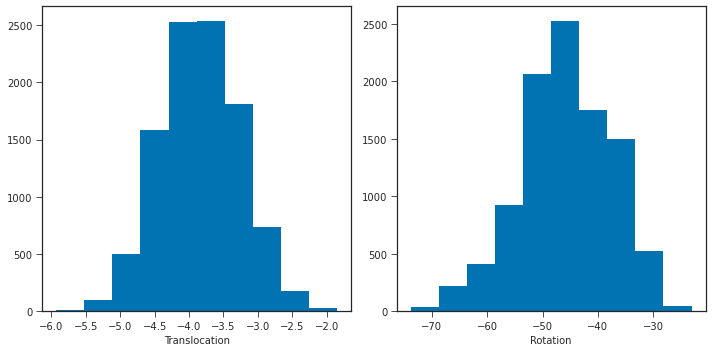

In [21]:
# averages for trajectroy #1003 (appears to be down state)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.hist(cv_trajs[1003][:, 0])
ax1.hist(cv_trajs[1003][:, 1])
ax0.set(xlabel="Translocation")
ax1.set(xlabel="Rotation")
f.tight_layout()

In [22]:
print(f"Average translocation: {np.mean(cv_trajs[1003][:,0])}")
print(f"Stdev translocation:   {np.std(cv_trajs[1003][:,0])}")
print(f"Average rotation:      {np.mean(cv_trajs[1003][:,1])}")
print(f"Stdev rotation:        {np.std(cv_trajs[1003][:,1])}")

Average translocation: -3.8361379999999996
Stdev translocation:   0.5743821001354412
Average rotation:      -45.7294273
Stdev rotation:        8.210233732295002


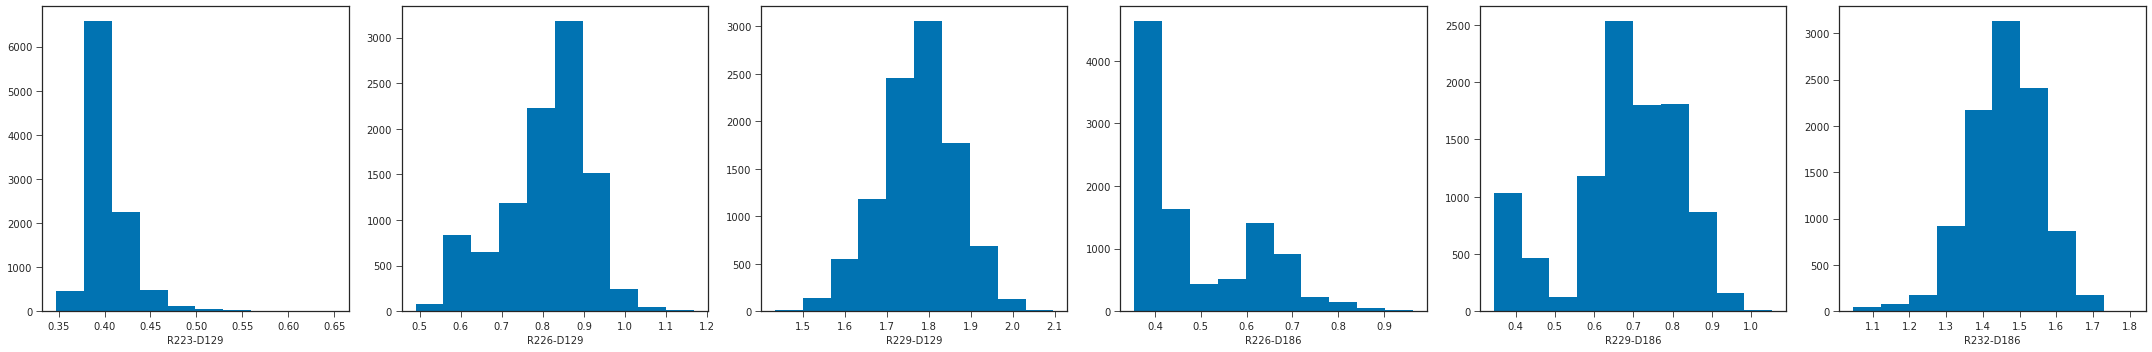

In [32]:
f, axs = plt.subplots(1, 6, figsize=(30, 5))
for i, ax in enumerate(axs):
    ax.hist(cv_trajs[1003][:, i + 2])
    ax.set(xlabel=f"{names[i + 2]}")
f.tight_layout()

In [33]:
for i in range(2, 8):
    print(f"Average {names[i]}:\t{np.mean(cv_trajs[1003][:, i]) * 10:.3f} Å")
    print(f"Stdev   {names[i]}:\t{np.std(cv_trajs[1003][:, i]) * 10:.3f} Å")

Average R223-D129:	4.043 Å
Stdev   R223-D129:	0.250 Å
Average R226-D129:	8.080 Å
Stdev   R226-D129:	1.051 Å
Average R229-D129:	17.754 Å
Stdev   R229-D129:	0.902 Å
Average R226-D186:	4.943 Å
Stdev   R226-D186:	1.235 Å
Average R229-D186:	6.777 Å
Stdev   R229-D186:	1.422 Å
Average R232-D186:	14.610 Å
Stdev   R232-D186:	0.982 Å


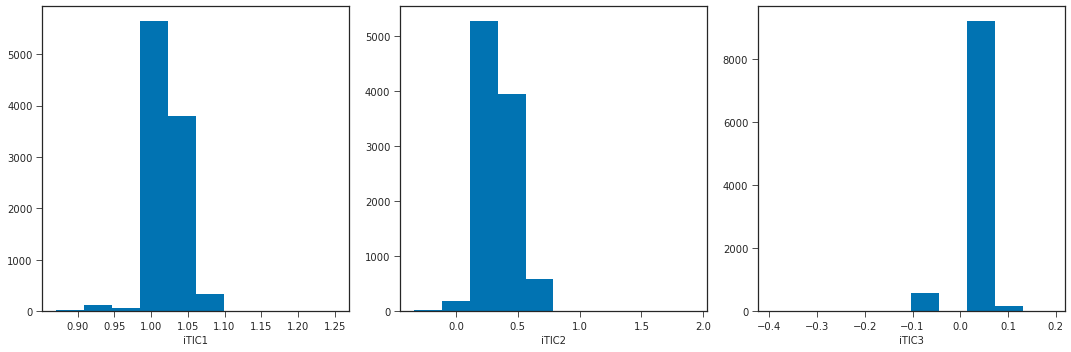

In [31]:
f, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axs):
    ax.hist(cv_trajs[1003][:, i + 14])
    ax.set(xlabel=f"{names[i + 14]}")
f.tight_layout()

In [32]:
for i in range(14, 17):
    print(f"Average {names[i]}:\t{np.mean(cv_trajs[1003][:, i]):.3f}")
    print(f"Stdev   {names[i]}:\t{np.std(cv_trajs[1003][:, i]):.3f}")

Average iTIC1:	1.014
Stdev   iTIC1:	0.022
Average iTIC2:	0.335
Stdev   iTIC2:	0.123
Average iTIC3:	0.034
Stdev   iTIC3:	0.032


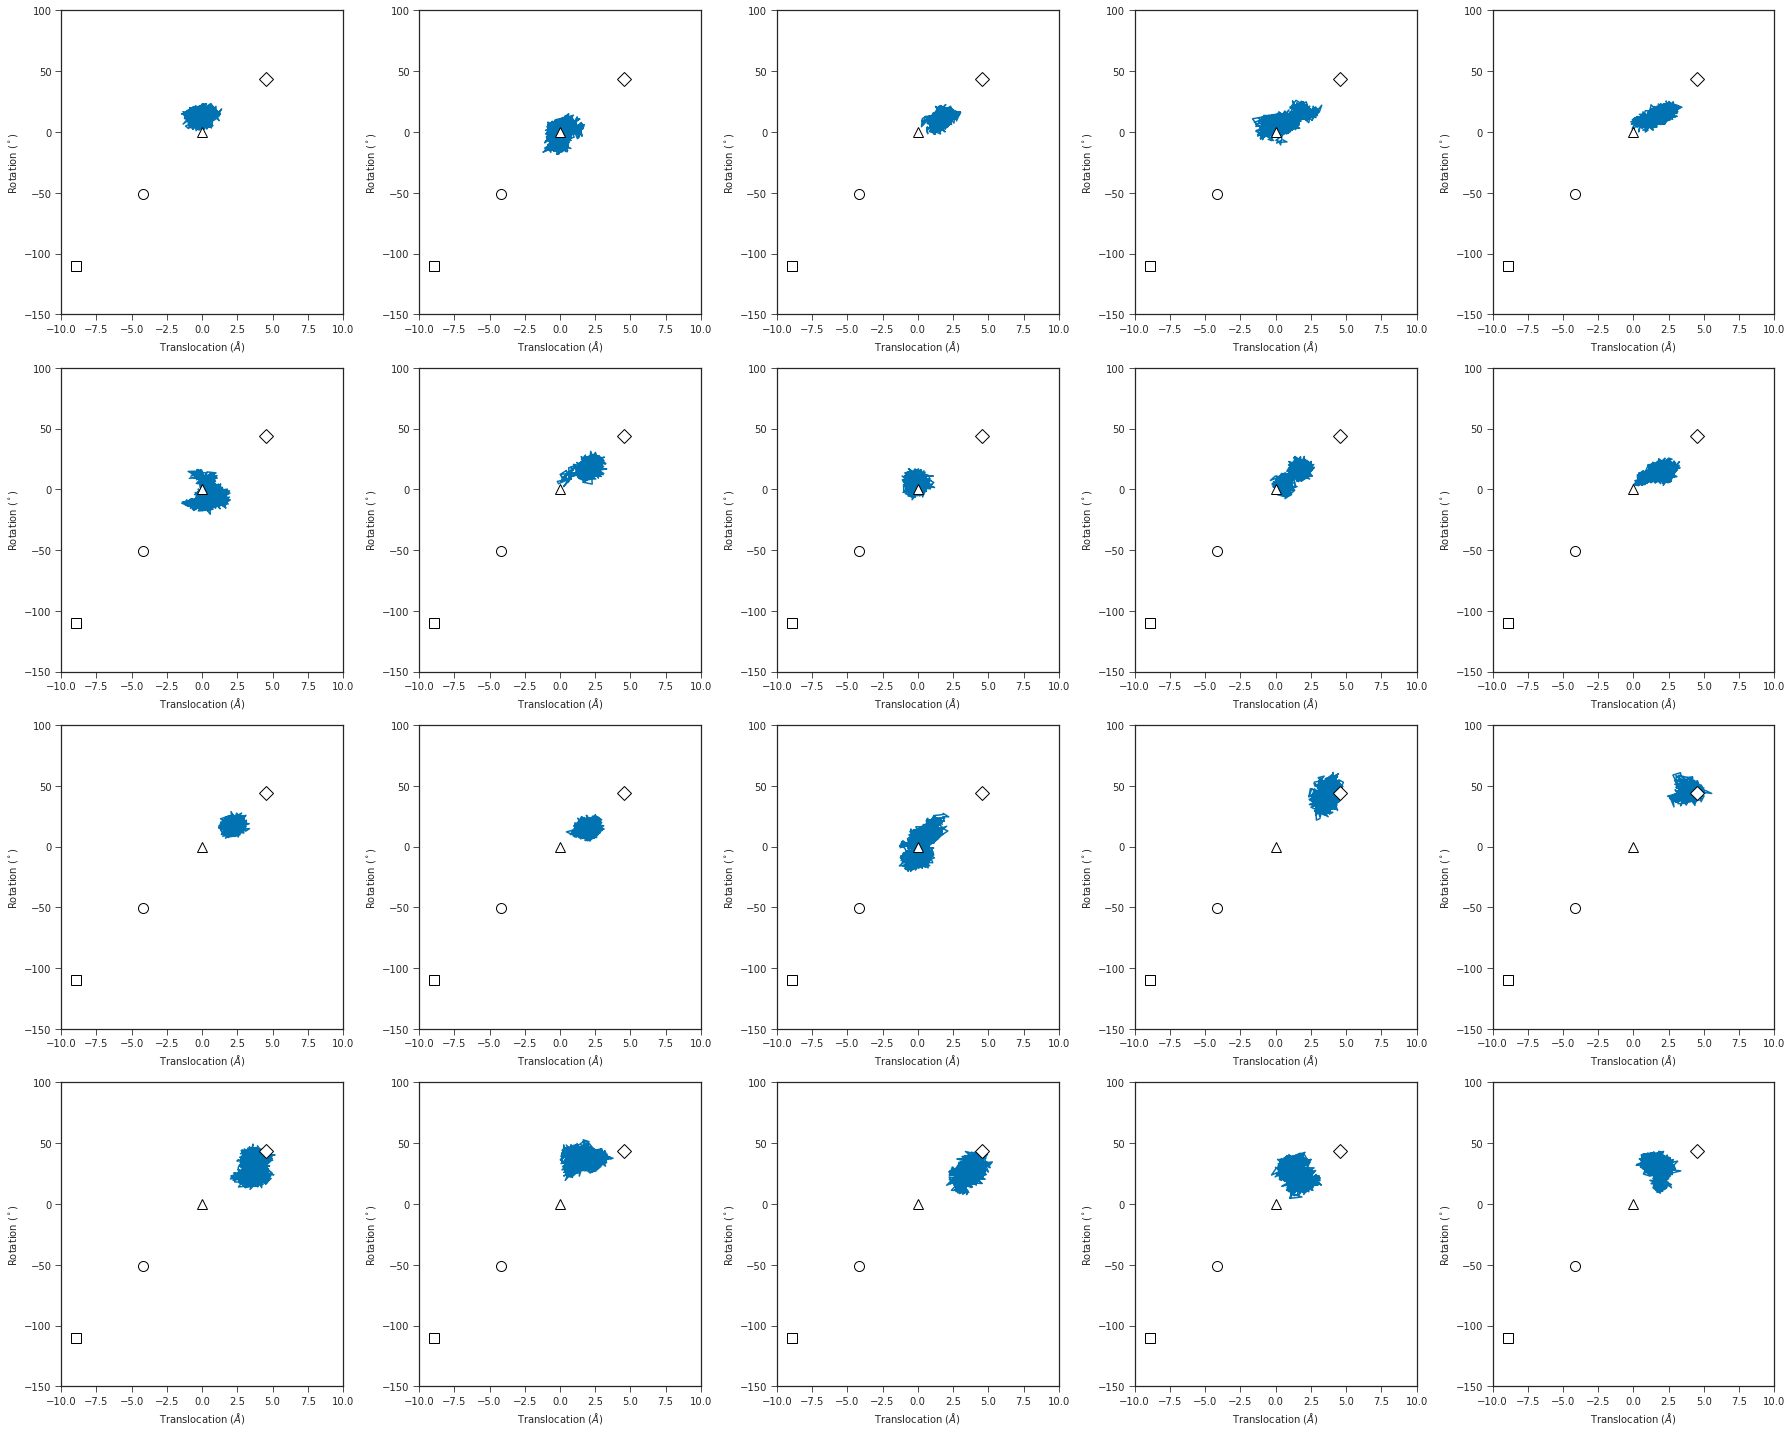

In [77]:
f, axs = plt.subplots(4, 5, figsize=(25, 20))
for i, ax in enumerate(axs.flat):
    ax.plot(cv_trajs[i + 980][:, 0], cv_trajs[i + 980][:, 1])
    util.format_cvs(ax)
f.tight_layout()

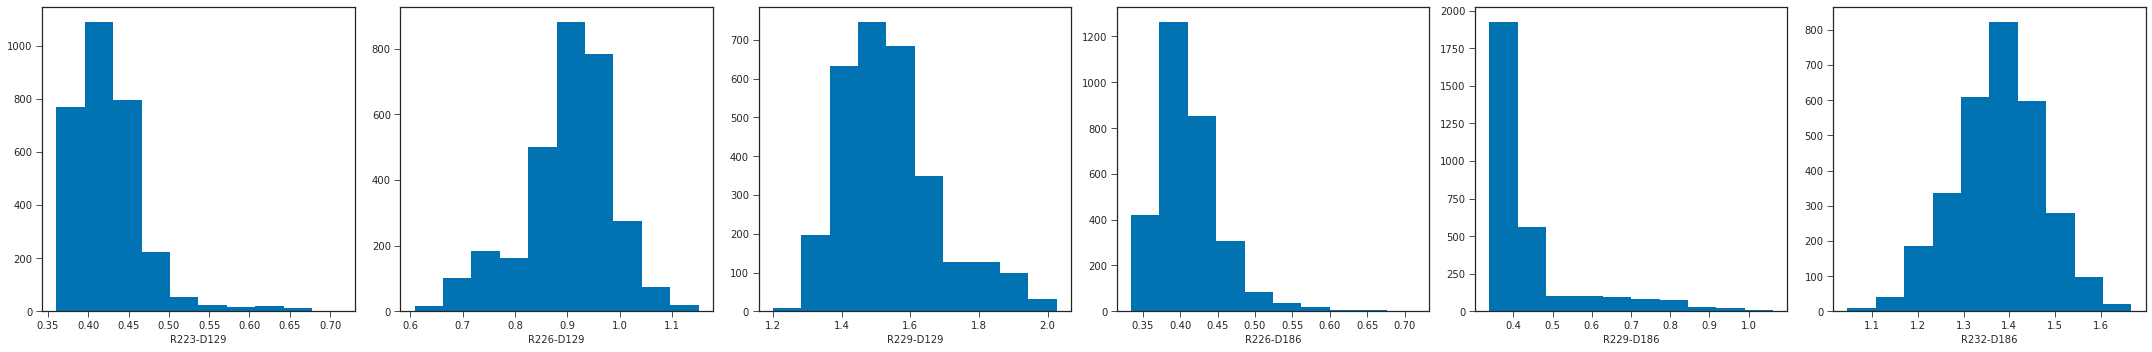

In [34]:
f, axs = plt.subplots(1, 6, figsize=(30, 5))
for i, ax in enumerate(axs):
    ax.hist(cv_trajs[58][:, i + 2])
    ax.set(xlabel=f"{names[i + 2]}")
f.tight_layout()

Probably should only take smaller R229-D186 distance (higher are where R3 is pivoted away) - cutoff around 5 or 6 Angstroms? (salt bridge distance)

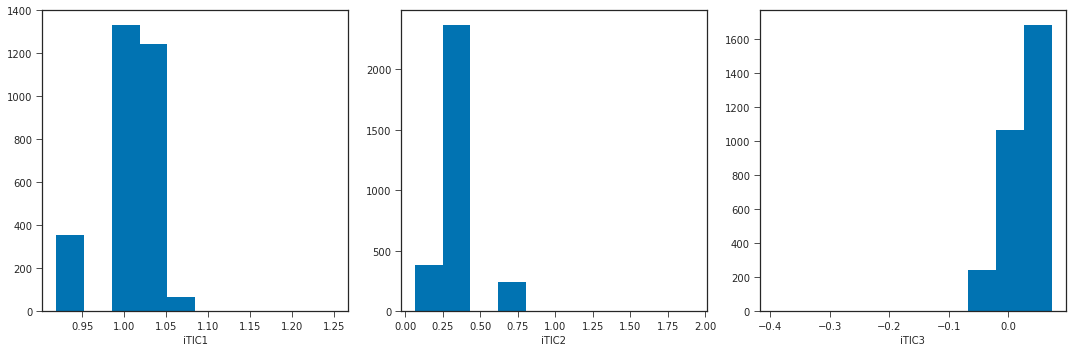

In [78]:
f, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axs):
    ax.hist(cv_trajs[58][:, i + 14])
    ax.set(xlabel=f"{names[i + 14]}")
f.tight_layout()

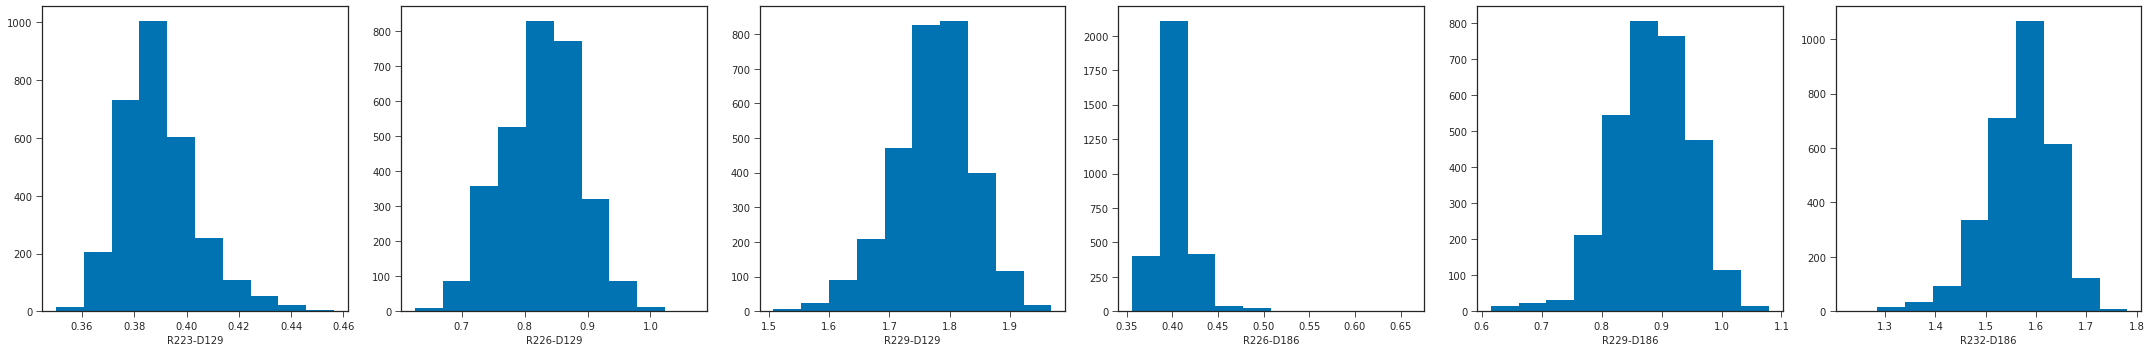

In [35]:
f, axs = plt.subplots(1, 6, figsize=(30, 5))
for i, ax in enumerate(axs):
    ax.hist(cv_trajs[67][:, i + 2])
    ax.set(xlabel=f"{names[i + 2]}")
f.tight_layout()

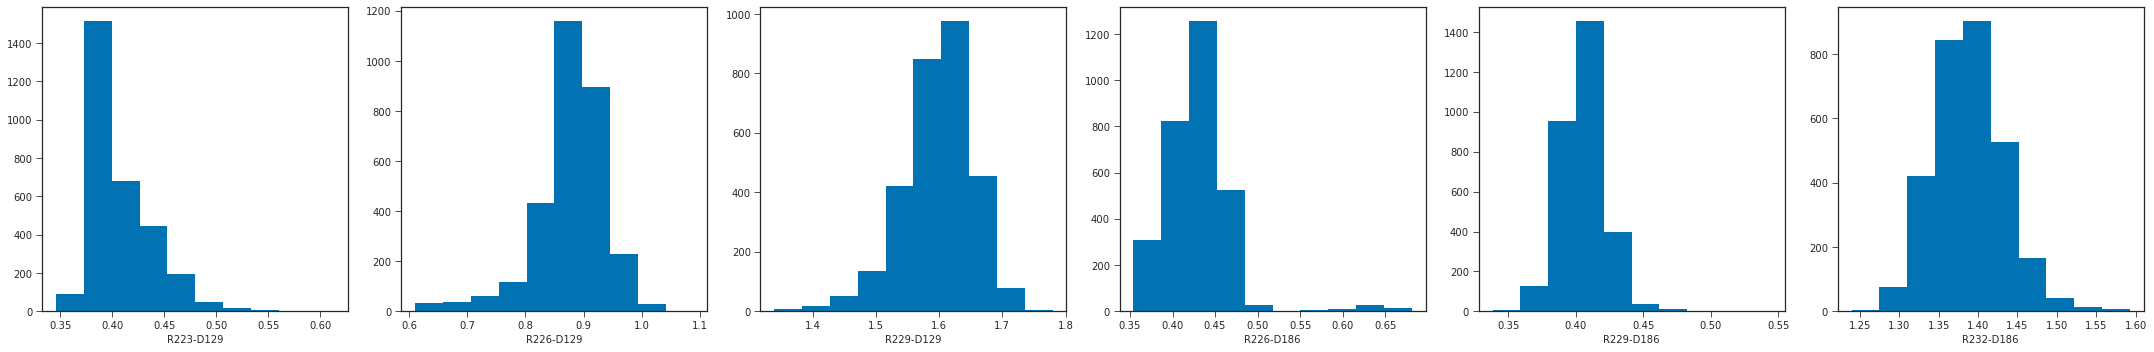

In [36]:
f, axs = plt.subplots(1, 6, figsize=(30, 5))
for i, ax in enumerate(axs):
    ax.hist(cv_trajs[577][:, i + 2])
    ax.set(xlabel=f"{names[i + 2]}")
f.tight_layout()

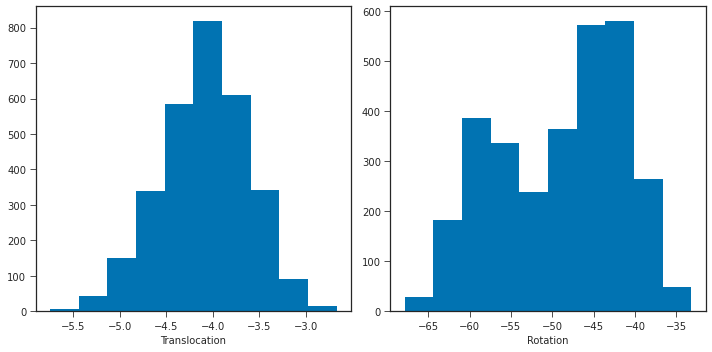

In [79]:
# averages for trajectroy #1003 (appears to be down state)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.hist(cv_trajs[577][:, 0])
ax1.hist(cv_trajs[577][:, 1])
ax0.set(xlabel="Translocation")
ax1.set(xlabel="Rotation")
f.tight_layout()

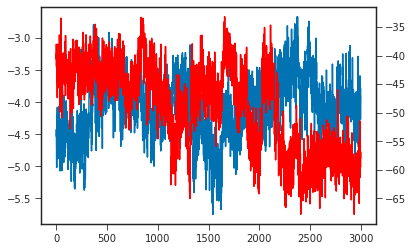

In [87]:
f, ax = plt.subplots()
plt.plot(cv_trajs[577][:, 0])
ax2 = plt.twinx()
ax2.plot(cv_trajs[577][:, 1], "r")

Seems very stable in down state

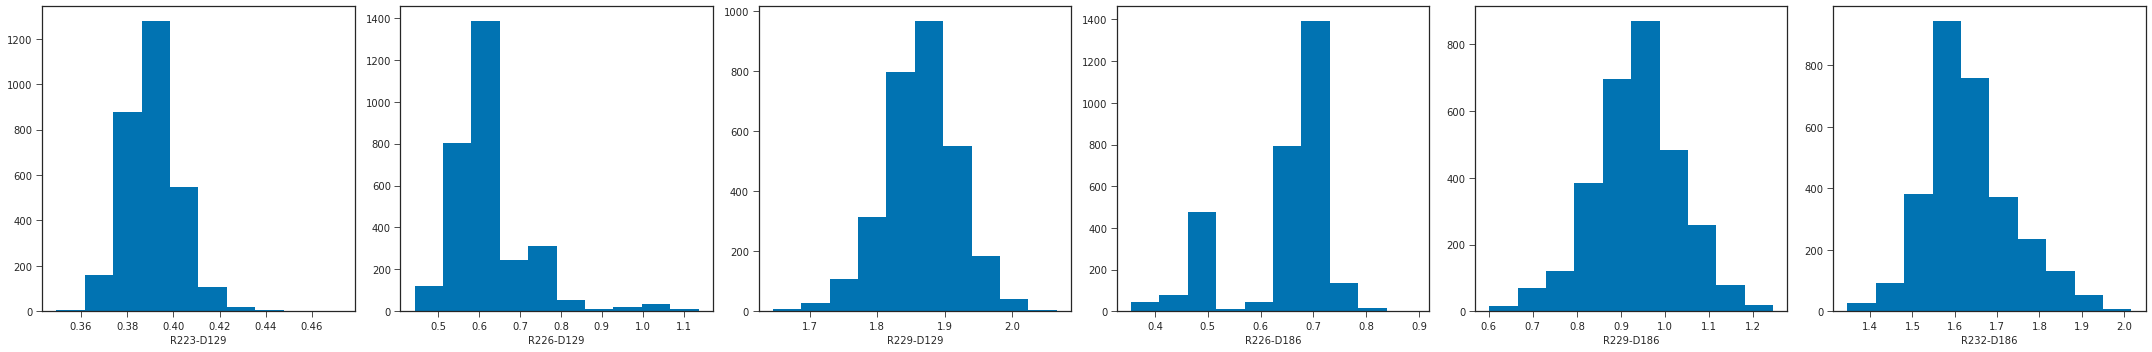

In [37]:
f, axs = plt.subplots(1, 6, figsize=(30, 5))
for i, ax in enumerate(axs):
    ax.hist(cv_trajs[678][:, i + 2])
    ax.set(xlabel=f"{names[i + 2]}")
f.tight_layout()

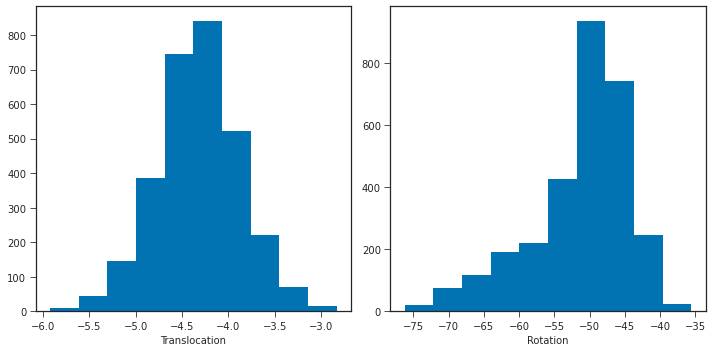

In [88]:
# averages for trajectroy #1003 (appears to be down state)
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.hist(cv_trajs[678][:, 0])
ax1.hist(cv_trajs[678][:, 1])
ax0.set(xlabel="Translocation")
ax1.set(xlabel="Rotation")
f.tight_layout()

R3-186 distance too large indicates pointed away

R2-D129 distance to small is bad too since R2 will be lodged inside hydrophobic plug (should probably be at least 0.7)

In [79]:
dist = cv_arr[:, 0]
rot = cv_arr[:, 1]
tic1 = cv_arr[:, 14]
sb1 = cv_arr[:, 5]  # R2-D186
sb2 = cv_arr[:, 6]  # R3-D186
sb3 = cv_arr[:, 3]  # R2-D129


# ellipse centered at (-4.174, -50.8) with radii 1.1 nm and 16 deg (2 sigma in each direction) for down state
# take points where TIC 1 < 1.2 and R2/R3-D186 distance < 0.5/0.55 (lower salt bridges)
dist_ax_down = (dist + 4.174) / 1.1
rot_ax_down = (rot + 50.8) / 16
down_ids = (
    ((dist_ax_down ** 2 + rot_ax_down ** 2) < 1)
    & (sb1 < 0.5)
    & (sb2 < 0.55)
    & (sb3 > 0.6)
    & (tic1 < 1.2)
).nonzero()[0]

In [80]:
down_cvs = cv_arr[down_ids]

In [81]:
down_cvs.shape

(36886, 18)

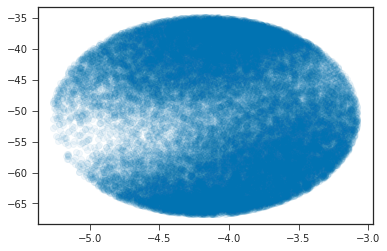

In [82]:
plt.scatter(*down_cvs[:, :2].T, alpha=0.05)

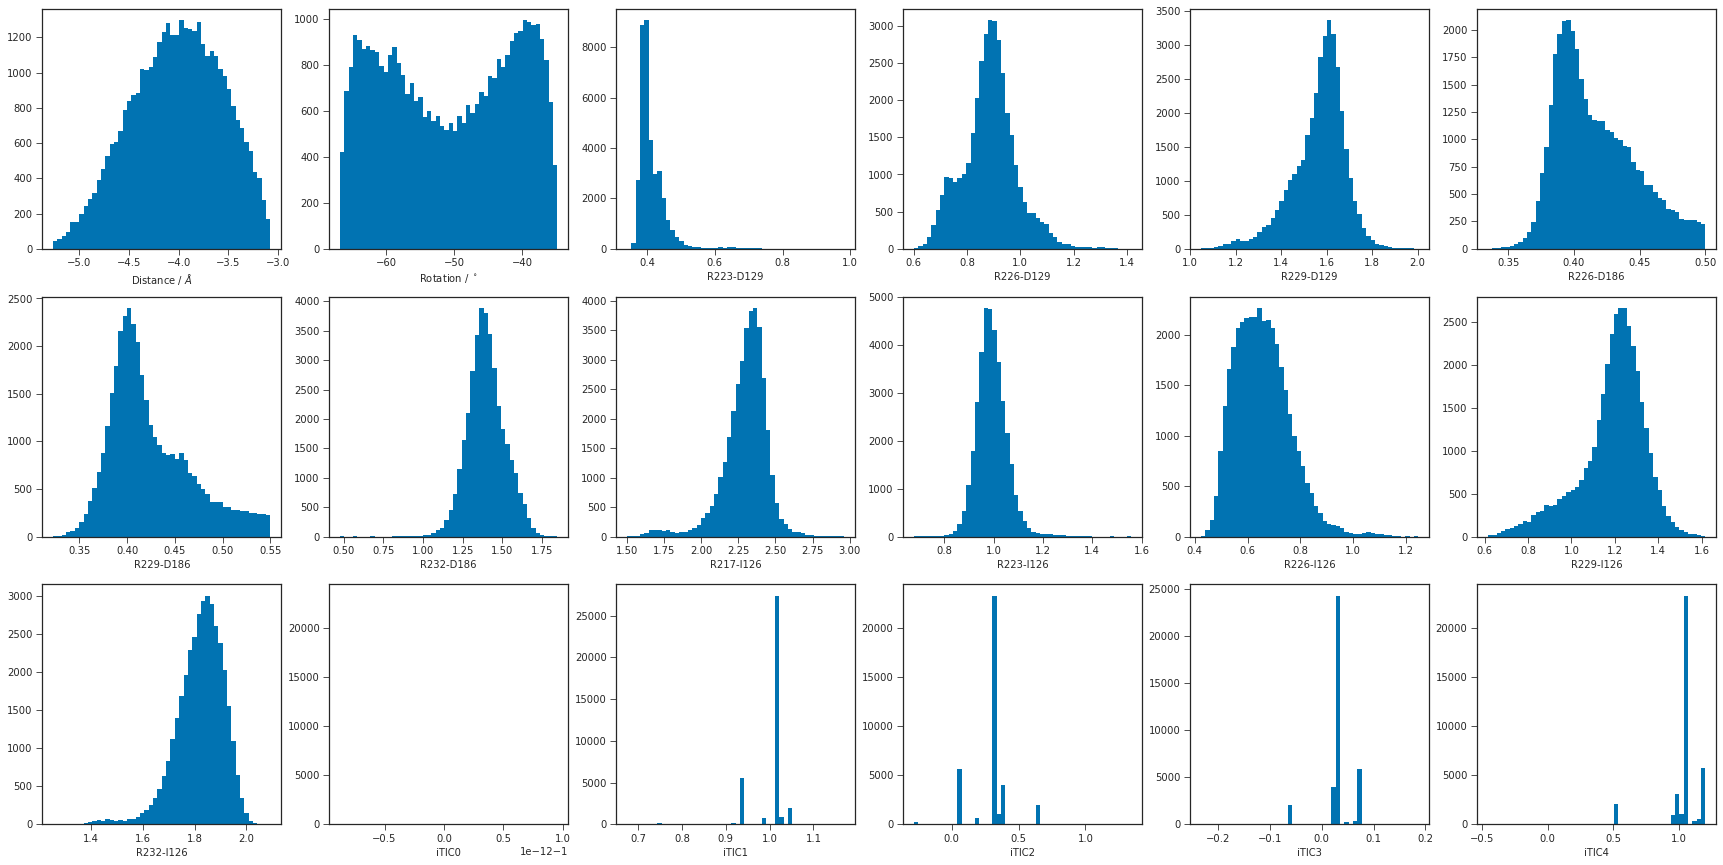

In [83]:
f, axs = plt.subplots(3, 6, figsize=(30, 15))
for i, ax in enumerate(axs.flat):
    ax.hist(down_cvs[:, i], bins=50)
    ax.set_xlabel(f"{names[i]}")

(array([  222.,  3361., 10214., 11872.,  7191.,  2773.,   778.,   248.,
          146.,    81.]),
 array([0.46529433, 0.5218964 , 0.5784985 , 0.6351006 , 0.69170266,
        0.7483048 , 0.80490685, 0.86150897, 0.918111  , 0.97471315,
        1.0313152 ], dtype=float32),
 <BarContainer object of 10 artists>)

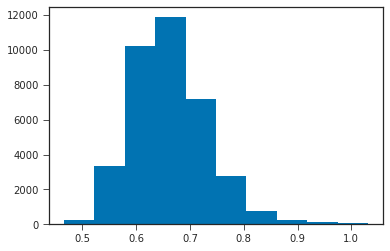

In [86]:
sb_down = sb_data_arr[down_ids]
# R226-D186 Ca distance
plt.hist(sb_down[:, 17])

In [88]:
# highest R226-D186 Ca distance
ids = (sb_down[:, 17]).argsort()
for ix in down_ids[ids[-10:]]:
    print(f"{util.frame(ix)}: {sb_data_arr[ix, 17]}")

(1107, 8312): 1.0143992900848389
(1107, 8134): 1.0144644975662231
(1107, 8118): 1.0151941776275635
(1107, 8284): 1.0159401893615723
(1107, 8321): 1.0166468620300293
(1107, 8029): 1.0178353786468506
(1107, 8093): 1.018466591835022
(1107, 8107): 1.018731713294983
(1107, 8490): 1.0195846557617188
(1107, 8018): 1.0313152074813843


(array([   52.,   503.,  1928.,  6267., 14165.,  9002.,  3248.,  1220.,
          443.,    58.]),
 array([0.61722106, 0.6842734 , 0.7513258 , 0.81837815, 0.8854305 ,
        0.9524828 , 1.0195352 , 1.0865875 , 1.1536399 , 1.2206923 ,
        1.2877446 ], dtype=float32),
 <BarContainer object of 10 artists>)

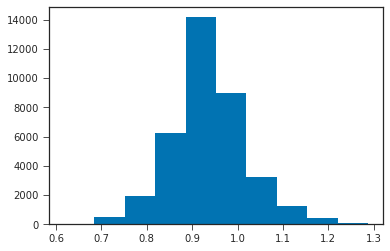

In [87]:
sb_down = sb_data_arr[down_ids]
# R226-E183 distance
plt.hist(sb_down[:, 46])

In [51]:
# highest R226-E183 distances
ids = (sb_down[:, 46]).argsort()
for ix in down_ids[ids[-10:]]:
    print(f"{util.frame(ix)}: {sb_data_arr[ix, 46]}")

(1110, 1847): 1.2582409381866455
(1061, 8007): 1.2626121044158936
(58, 1233): 1.2713733911514282
(58, 1230): 1.2740776538848877
(1008, 5615): 1.274578332901001
(1065, 5877): 1.280503511428833
(1110, 1804): 1.283103585243225
(1008, 4342): 1.2860381603240967
(1107, 7594): 1.2863844633102417
(1110, 1684): 1.2877446413040161


In [33]:
# highest R229-D186 distances
ids = (down_cvs[:, 6]).argsort()
for ix in down_ids[ids[-10:]]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 6]}, {sb_data_arr[ix, 46]}")

(569, 571): 0.5498561859130859, 0.9490654468536377
(583, 142): 0.5498782396316528, 0.969055712223053
(1008, 1230): 0.549899160861969, 0.9792798757553101
(1008, 6065): 0.5499308705329895, 1.1838489770889282
(58, 1064): 0.5499454736709595, 0.9883695840835571
(1065, 6790): 0.5499464273452759, 0.8502570390701294
(69, 1901): 0.549953281879425, 0.9678478837013245
(583, 997): 0.5499707460403442, 0.9792901277542114
(365, 1993): 0.5499764680862427, 0.9178600907325745
(1115, 5723): 0.5499908328056335, 1.0149340629577637


In [93]:
# highest R226-I126 distances
ids = (down_cvs[:, 10]).argsort()
for ix in down_ids[ids[-10:]]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 10]}, {cv_arr[ix, 14:16]}")

(1107, 7547): 1.168591022491455, [1.04831006 0.63431661]
(1107, 7619): 1.172792911529541, [1.04831006 0.63431661]
(1107, 7824): 1.1762317419052124, [1.04831006 0.63431661]
(1107, 7882): 1.1797715425491333, [1.04831006 0.63431661]
(1107, 7743): 1.1802624464035034, [1.04831006 0.63431661]
(1107, 7740): 1.198075532913208, [1.04831006 0.63431661]
(1107, 7883): 1.204797625541687, [1.04831006 0.63431661]
(1107, 7685): 1.2095192670822144, [1.04831006 0.63431661]
(1107, 7623): 1.2314732074737549, [1.04831006 0.63431661]
(1107, 7620): 1.2472487688064575, [1.04831006 0.63431661]


In [96]:
# lowest iTIC2 distances
ids = (down_cvs[:, 15]).argsort()
for ix in down_ids[ids[:10]]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 15]}")

(874, 2279): -0.2805440348596256
(724, 1104): -0.2805440348596256
(724, 1103): -0.2805440348596256
(822, 2392): -0.2805440348596256
(874, 1025): -0.2805440348596256
(874, 1999): -0.2805440348596256
(874, 2694): -0.2805440348596256
(874, 2688): -0.2805440348596256
(674, 2986): -0.2805440348596256
(674, 2919): -0.2805440348596256


In [90]:
# smallest R226-D129 distances
ids = (down_cvs[:, 3]).argsort()
for ix in down_ids[ids[:10]]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 3]}")

(1179, 21840): 0.6008152961730957
(1179, 22152): 0.6022308468818665
(1006, 1725): 0.6029220819473267
(1179, 22150): 0.6078305840492249
(681, 2611): 0.609978973865509
(681, 2400): 0.6100672483444214
(1102, 6025): 0.6104908585548401
(681, 2609): 0.6128782033920288
(1179, 21844): 0.6135935187339783
(1053, 9690): 0.6153138875961304


In [84]:
# what are lowest rotation states
ids_1 = (down_cvs[:, 1]).argsort()
for ix in down_ids[ids_1[:10]]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 1]}")

(37, 2994): -66.776
(368, 1848): -66.761
(571, 2628): -66.759
(58, 1768): -66.755
(1004, 2572): -66.753
(36, 1122): -66.753
(455, 570): -66.74
(58, 966): -66.737
(1053, 8960): -66.737
(690, 676): -66.736


In [91]:
# what are highest rotation states
ids_1 = (down_cvs[:, 1]).argsort()
for ix in down_ids[ids_1[-10:]]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 1]}, {cv_arr[ix, 3]}")

(374, 2676): -34.849, 0.8036435842514038
(874, 1398): -34.848, 0.705510675907135
(874, 1009): -34.841, 0.8038557767868042
(30, 2869): -34.841, 0.9658988118171692
(920, 2834): -34.824, 0.8671501278877258
(374, 2678): -34.819, 0.7745850086212158
(722, 1270): -34.813, 0.751773476600647
(874, 1883): -34.809, 0.8586809039115906
(493, 603): -34.808, 0.856979489326477
(347, 608): -34.806, 0.9908096194267273


In [41]:
# what are lowest distance states
ids_1 = (down_cvs[:, 0]).argsort()
for ix in down_ids[ids_1[:10]]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 0]}")

(378, 289): -5.264
(378, 912): -5.263
(378, 343): -5.263
(76, 2073): -5.263
(76, 2037): -5.261
(1113, 1229): -5.259
(362, 987): -5.259
(362, 1200): -5.253
(455, 931): -5.253
(76, 2085): -5.251


In [112]:
# what are highest R2-I126 distances
ids = (downmin_cvs[:, 10]).argsort()
for ix in downmin_ids[ids[-10:]]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 10]}")

(1107, 7618): 1.1526517868041992
(1107, 7693): 1.1554268598556519
(1107, 7711): 1.1557997465133667
(1107, 7654): 1.1562172174453735
(1107, 7824): 1.1762317419052124
(1107, 7622): 1.196623682975769
(1107, 7686): 1.2090978622436523
(1107, 7685): 1.2095192670822144
(1107, 7623): 1.2314732074737549
(1107, 7746): 1.2506195306777954


Expanded states

In [30]:
# points with iTIC2 near 2.0
ids = (down_cvs[:, 15]).argsort()
for ix in down_ids[ids[-20:]]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 14]}")

(652, 498): 1.075494723561616
(1178, 1464): 1.075494723561616
(1178, 1461): 1.075494723561616
(79, 1301): 1.075494723561616
(58, 188): 1.075494723561616
(497, 837): 1.075494723561616
(1000, 4392): 1.075494723561616
(79, 1230): 1.075494723561616
(1008, 5908): 1.075494723561616
(497, 500): 1.075494723561616
(497, 539): 1.075494723561616
(1065, 487): 1.075494723561616
(497, 614): 1.075494723561616
(497, 710): 1.075494723561616
(497, 219): 1.075494723561616
(497, 797): 1.075494723561616
(1002, 2124): 1.075494723561616
(497, 374): 1.075494723561616
(1179, 12030): 1.075494723561616
(1179, 12033): 1.1706289547553212


# Up state 

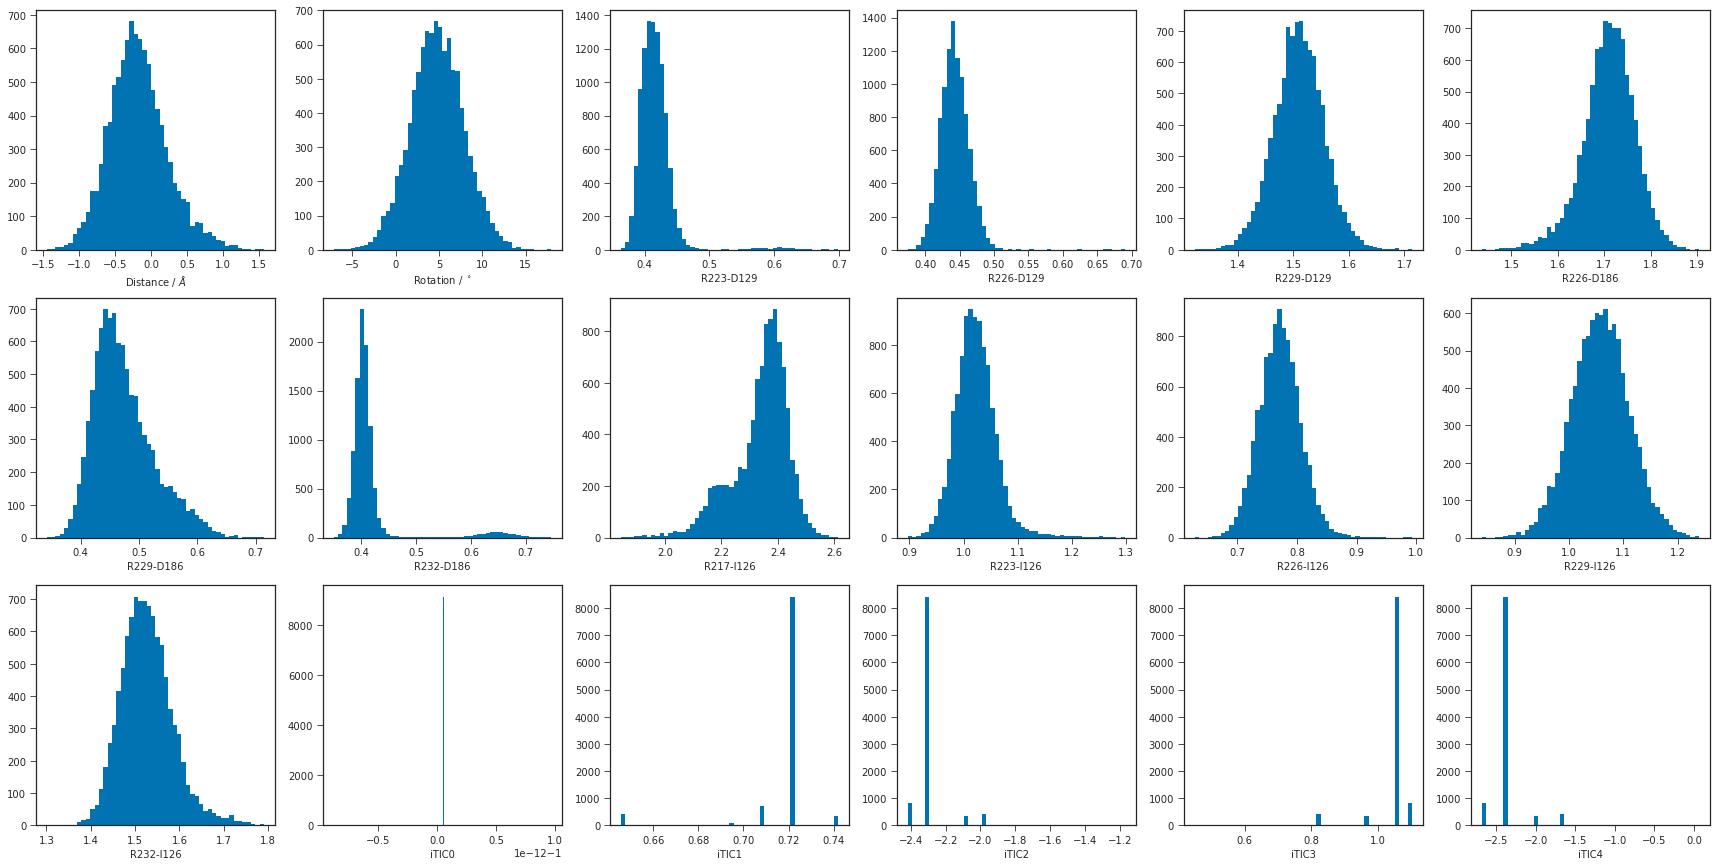

In [38]:
# averages for trajectroy #1221 (appears to be up state)
f, axs = plt.subplots(3, 6, figsize=(30, 15))
for i, ax in enumerate(axs.flat):
    ax.hist(cv_trajs[1221][:, i], bins=50)
    ax.set_xlabel(f"{names[i]}")

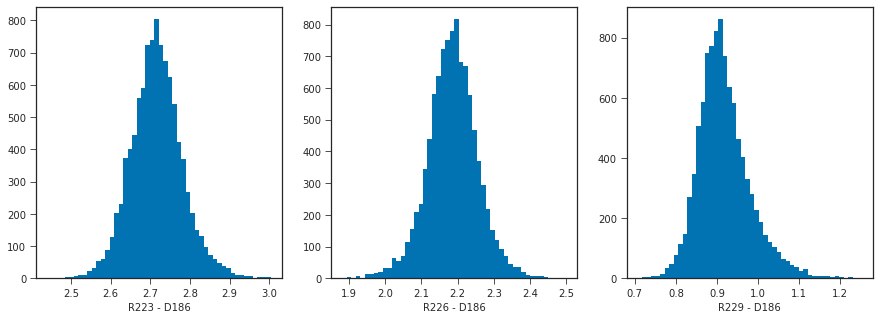

In [21]:
# averages for trajectroy #1221 (appears to be up state)
f, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot distances to D186
for i, ax in zip(range(40, 58, 6), axs.flat):
    ax.hist(sb_data[1221][:, i], bins=50)
    ax.set_xlabel(f"{sb_labels[i - 30]}")

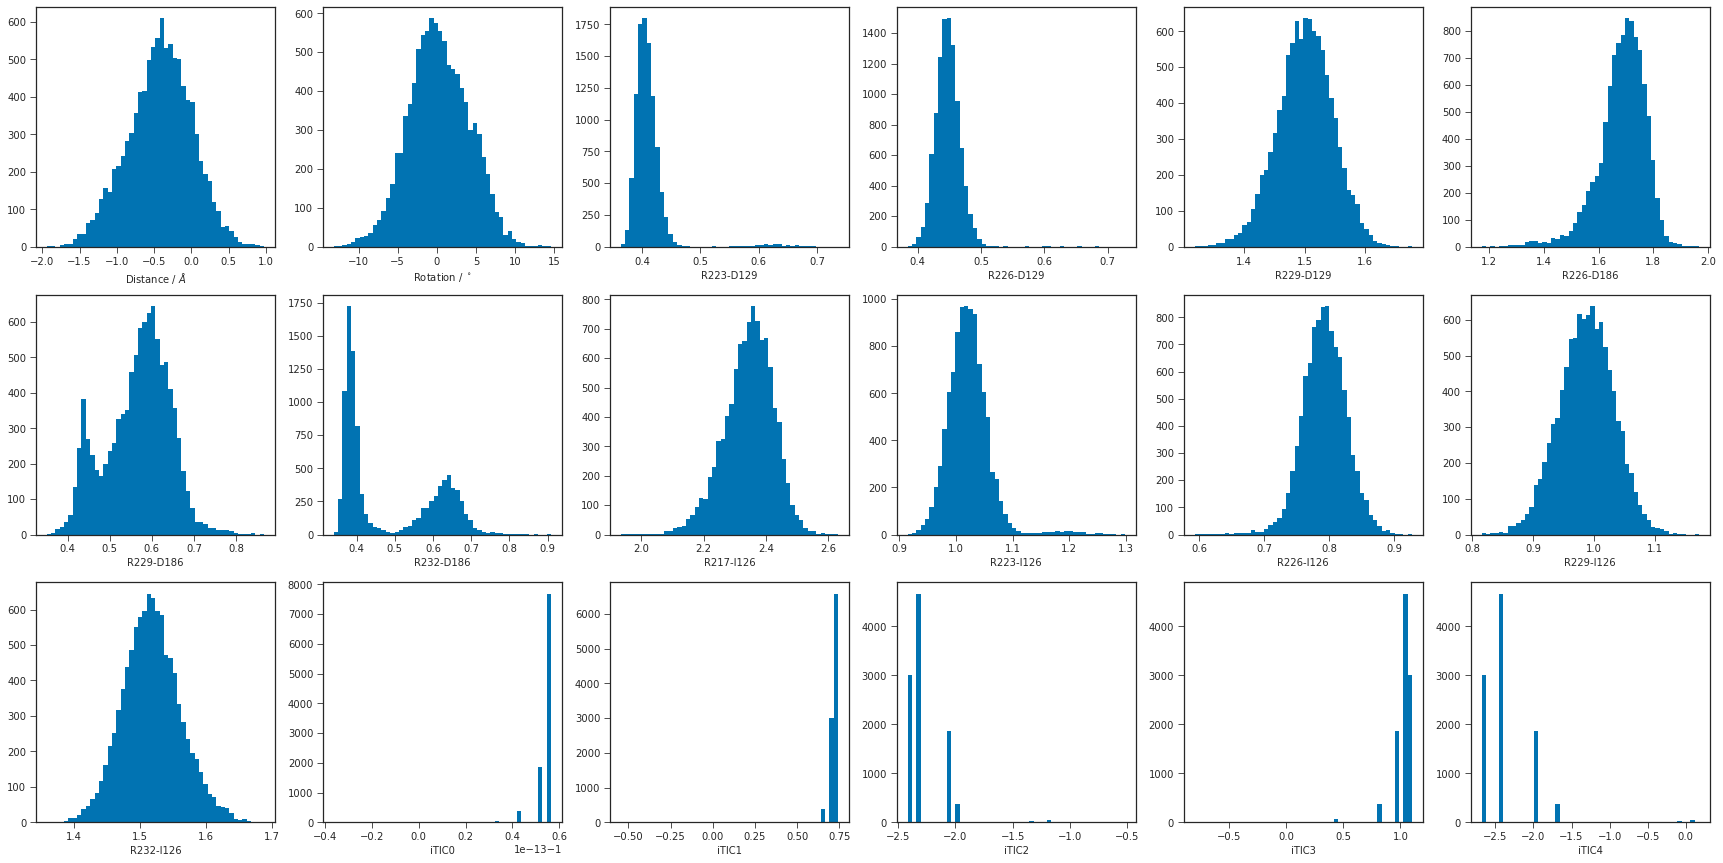

In [39]:
# averages for trajectroy #1262 (appears to be up state)
f, axs = plt.subplots(3, 6, figsize=(30, 15))
for i, ax in enumerate(axs.flat):
    ax.hist(cv_trajs[1262][:, i], bins=50)
    ax.set_xlabel(f"{names[i]}")

In [18]:
print(f"Average translocation: {np.mean(cv_trajs[1221][:,0])}")
print(f"Stdev translocation:   {np.std(cv_trajs[1221][:,0])}")
print(f"Average rotation:      {np.mean(cv_trajs[1221][:,1])}")
print(f"Stdev rotation:        {np.std(cv_trajs[1221][:,1])}")

Average translocation: -0.17954989999999998
Stdev translocation:   0.4033633874188261
Average rotation:      4.8115388
Stdev rotation:        3.049064937402049


In [19]:
print(f"Average translocation: {np.mean(cv_trajs[1262][:,0])}")
print(f"Stdev translocation:   {np.std(cv_trajs[1262][:,0])}")
print(f"Average rotation:      {np.mean(cv_trajs[1262][:,1])}")
print(f"Stdev rotation:        {np.std(cv_trajs[1262][:,1])}")

Average translocation: -0.42275910000000005
Stdev translocation:   0.4248164399681232
Average rotation:      0.2686278
Stdev rotation:        3.847769117978255


These two not so good since iTIC2 is low, in expanded states

In [52]:
dist = cv_arr[:, 0]
rot = cv_arr[:, 1]
tic2 = cv_arr[:, 15]
sb1 = cv_arr[:, 6]  # R3-D186
sb2 = cv_arr[:, 7]  # R4-D186
sb3 = cv_arr[:, 5]  # R2-D186


# ellipse centered at (0, 0) with radii 0.84 nm and 7.6 deg (2 sigma in each direction) for down state
# take points where TIC 2 > -1.0 and R3/R4-D186 salt bridges < 0.5/0.6 nm, R2-D186 > 1
up_ids = (
    (((dist / 0.84) ** 2 + (rot / 7.6) ** 2) < 1)
    & (sb1 < 0.5)
    & (sb2 < 0.6)
    & (sb3 > 1.0)
    & (tic2 > -1)
).nonzero()[0]

In [53]:
up_cvs = cv_arr[up_ids]
print(len(up_cvs))

93105


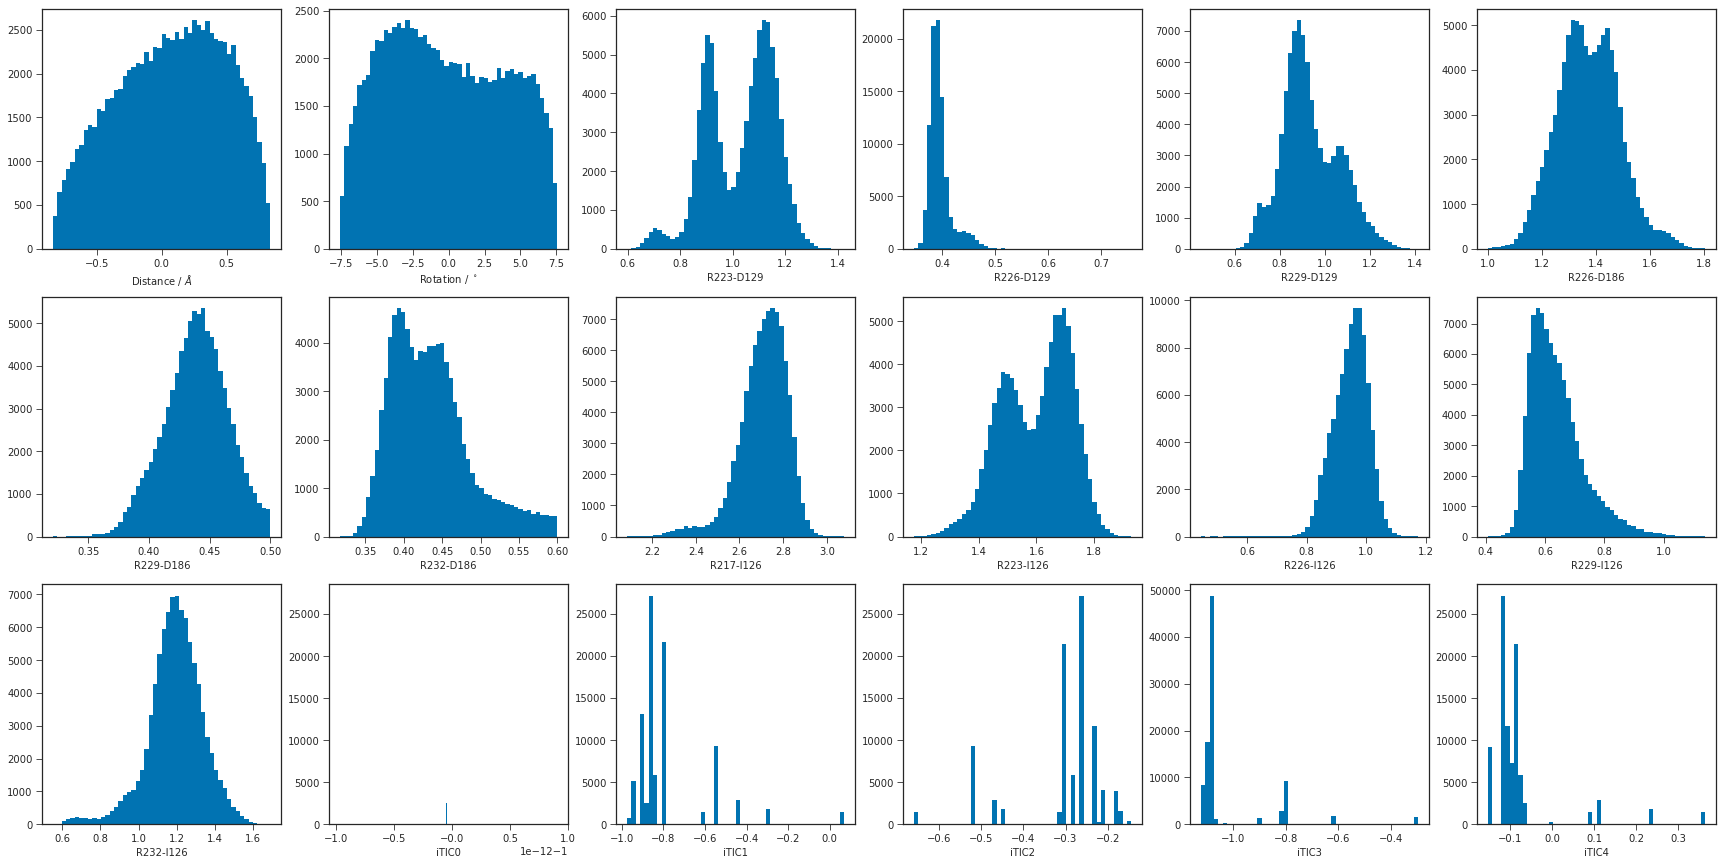

In [60]:
f, axs = plt.subplots(3, 6, figsize=(30, 15))
for i, ax in enumerate(axs.flat):
    ax.hist(up_cvs[:, i], bins=50)
    ax.set_xlabel(f"{names[i]}")

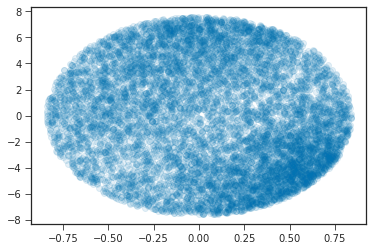

In [57]:
plt.scatter(*up_cvs[::10, :2].T, alpha=0.1)

In [61]:
# max of R226 - D129 distance
ids_1 = (up_cvs[:, 3]).argsort()
for ix in up_ids[ids_1[-10:]]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 3:6:2]}")

(275, 1393): [0.59836143 1.21562004]
(263, 954): [0.5999366  1.25287175]
(263, 951): [0.60894763 1.3285712 ]
(752, 2703): [0.60943675 1.31219327]
(1192, 381): [0.65087086 1.37444723]
(1205, 381): [0.65087086 1.37444723]
(928, 80): [0.65290576 1.00488842]
(1257, 7980): [0.75726485 1.27089071]
(1252, 7980): [0.75726485 1.27089071]
(1212, 7980): [0.75726485 1.27089071]


In [62]:
# max of R229 - D129 distance
ids_1 = (up_cvs[:, 4]).argsort()
for ix in up_ids[ids_1[-10:]]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 4]}")

(1218, 2463): 1.3748397827148438
(1227, 2463): 1.3748397827148438
(1198, 2463): 1.3748397827148438
(351, 938): 1.3809837102890015
(901, 322): 1.388218641281128
(270, 2874): 1.3891021013259888
(262, 665): 1.3901772499084473
(262, 670): 1.3907370567321777
(262, 667): 1.3952988386154175
(901, 328): 1.4154510498046875


In [63]:
# min of R226 - D186 distance
ids_1 = (up_cvs[:, 5]).argsort()
for ix in up_ids[ids_1[:10]]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 5]}")

(197, 1852): 1.001155972480774
(197, 2767): 1.0012848377227783
(626, 103): 1.0021008253097534
(928, 80): 1.0048884153366089
(275, 1229): 1.0050994157791138
(626, 116): 1.005350947380066
(94, 422): 1.0058484077453613
(928, 6): 1.0060393810272217
(275, 846): 1.0067362785339355
(626, 272): 1.0076770782470703
